In [28]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing                      
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam


In [29]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\forestfires.csv',delimiter=",")

In [30]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [31]:
df.loc[df.size_category=='large','size_category'] = 1
df.loc[df.size_category=='small','size_category'] = 0

In [32]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [34]:
df['month']=df['month'].astype('category')
df['day']=df['day'].astype('category')
df['size_category']=df['size_category'].astype('int')

In [35]:
label_encoder = preprocessing.LabelEncoder()
df['month']=label_encoder.fit_transform(df['month'])
df['day']=label_encoder.fit_transform(df['day'])

In [37]:
X = df.drop(['size_category'], axis=1)
y = df['size_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train.shape

(413, 30)

In [40]:
# Create a function that returns a compiled neural network model with the given hyperparameters
def create_model(neuron1=4, neuron2=2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [41]:
# Create a KerasClassifier wrapper for the model
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\User\AppData\Local\Temp\ipykernel_2872\1624846439.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [42]:
# Define the grid search parameters
param_grid = dict(neuron1=[4, 8, 16], neuron2=[2, 4, 8], batch_size=[10], epochs=[100], learning_rate=[0.001])

In [43]:
# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/9] END batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.928 total time=   3.7s
[CV 2/5; 1/9] START batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/9] END batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.916 total time=   3.9s
[CV 3/5; 1/9] START batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/9] END batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.892 total time=   3.6s
[CV 4/5; 1/9] START batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 1/9] END batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.963 total time=   4.1s
[CV 5/5; 1/9] START batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 1/9] END batch_size=10, epochs=100, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.963 total time=   4.1s
[CV 1/5; 2/9] START batch_size=10, epochs=10

In [45]:
# Print the results
print(f'Best score: {grid_result.best_score_:.4f}')
print(f'Best parameters: {grid_result.best_params_}')

Best score: 0.9565
Best parameters: {'batch_size': 10, 'epochs': 100, 'learning_rate': 0.001, 'neuron1': 4, 'neuron2': 8}


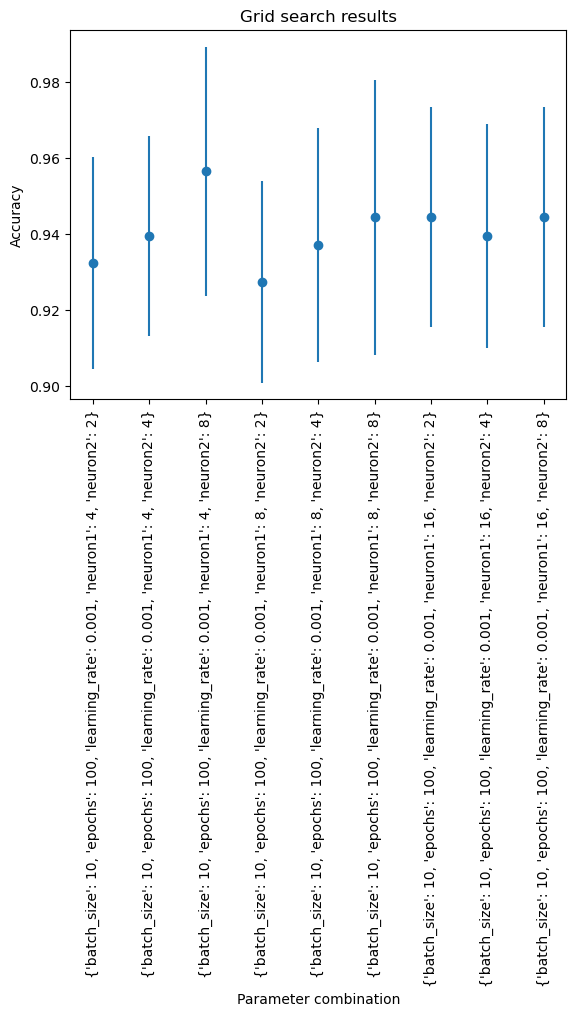

In [46]:
import matplotlib.pyplot as plt

# Get the mean test scores and standard deviations for each parameter combination
mean_scores = grid_result.cv_results_['mean_test_score']
std_scores = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# Plot the results
plt.errorbar(range(len(params)), mean_scores, yerr=std_scores, fmt='o')
plt.xticks(range(len(params)), [str(p) for p in params], rotation=90)
plt.xlabel('Parameter combination')
plt.ylabel('Accuracy')
plt.title('Grid search results')
plt.show()
